In [ ]:
#biasanya nnti ada kode yang abis dirun ada warningnya maka kita bisa menghilangkannya dengan kode berikut
import warnings
warnings.filterwarnings('ignore')

#import library python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PZSIB - DATA ANALYTICS/Telco-Customer-Churn.csv", encoding='utf-8')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Missing Values Checking

In [ ]:
#melihat informasi pada dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#mengecek value null pada dataset dengan menggunakan .isnull() dan .sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#mengecek value null pada dataset dengan menggunakan .isna() dan .sum()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Cara 1 untuk mengecek value blank pada kolom TotalCharges
df[df['TotalCharges'] ==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# pd.to_numeric digunakan untuk mengubah typedata menjadi numerik
# errors ="coerce" berfungsi untuk mengubah secara otomatis menjadi float/int sesuai dengan isi data atau isi value tersebut
#Mengubah type data pada dataframe kolom TotalCharges karena menyesuaikan isi dengan type data pada kolom
#object/string -> float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
#mengecek value null kembali pada dataset dengan menggunakan .isnull() dan .sum()
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#mengecek value null kembali pada dataset dengan menggunakan .isna() dan .sum()
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

ini membuktikan bahwa  kesalahan semacam ini dikarenakan ada missing values pada kolom price tersebut. Blank cell atau karakter lainnya yang merepresentasikan missing values dianggap object (string) sehingga secara keseluruhan kolom tersebut juga akan dianggap bertipe data object, karena ada string dan integer. Jadi, ketika kita ingin melihat missing value pada suatu dataframe tadi missing value atau blank tidak dapat didetect dengan hanya menggunakan kode tersebut.

  maka Pengecekan tipe data untuk tiap features (kolom) merupakan hal yang sangat penting untuk analisis dan eksplorasi data ke depannya. Maka ketika menemukan ketidaksesuaian tipe data seperti kasus di atas, kita harus mengkonversinya menjadi tipe data yang seharusnya.


Selanjutnya melakukan penghapusan atau drop data pada value yang blank atau missing value. Ada 3 cara untuk menghandle missing value pada suatu dataframe yaitu:
1.   Menghapus atau drop
2.   Replace
3.   Membiarkannya

pada kasus ini kita dapat melakukan penghapusan atau drop karena data tersebut kecil dan tidak terlalu berpengaruh atau impactnya tidak terlalu besar dan data tersebut tetap akan berguna.



In [ ]:
# # Hapus baris dari fitur yang memiliki nilai yang hilang
df.dropna(subset=['TotalCharges'], inplace=True)

In [ ]:
#mengecek value null kembali pada dataset dengan menggunakan .isnull() dan .sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#melihat shape pada dataframe setelah didrop rownya
#dari 7043 -> 7032
df.shape

(7032, 21)

# Categorical Data Encoding

Data ordinal = data yang memiliki tingkatan atau urutan, contoh categorical data encoding dengan Label encoding dan Ordinal encoding

Data nominal = data yang tidak memiliki tingkatan atau urutan, contoh categorical data encoding dengan One Hot encoding

In [ ]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
#Label encoding mengubah setiap nilai dalam kolom menjadi angka yang berurutan agar lebih mudah diproses dan label harus merepresentasikan data awal atau sebelum diubah
#Label encoding juga memudahkan komputer dalam membaca sebuah data karena data-data yang dapat dibaca adalah data-data numerik maka kita harus mengubah data categorical -> numerical
#This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.
df['Partner'] = df['Partner'].astype('category').cat.codes
df['Dependents'] = df['Dependents'].astype('category').cat.codes
df['PhoneService'] = df['PhoneService'].astype('category').cat.codes
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category').cat.codes
df['Churn'] = df['Churn'].astype('category').cat.codes
df['InternetService'] = df['InternetService'].astype('category').cat.codes
df['MultipleLines'] = df['MultipleLines'].astype('category').cat.codes
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup'] = df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection'] = df['DeviceProtection'].astype('category').cat.codes
df['TechSupport'] = df['TechSupport'].astype('category').cat.codes
df['StreamingTV'] = df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies'] = df['StreamingMovies'].astype('category').cat.codes
df['Contract'] = df['Contract'].astype('category').cat.codes
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,Mailed check,53.85,108.15,1


In [ ]:
#untuk jenis Categorical Data Encoding yang tidak dapat menggunakan cara "Label Encoding" maka, dapat menggunakan "One hot encoding" jika data tersebut memiliki category lebih dari 2 yakni Paymenmethod dan gender
#kondisi ini memudahkan algoritma machine learning membagi category dengan numerik
#This type of encoding is used when the data is nominal
#.get_dummies berfungsi untuk membuat data dummy dengan metode yang kita ingin masukan
dummies_PaymentMethod = pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod')
dummies_PaymentMethod.head()

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [ ]:
#.concat berfungsi untuk menggabungkan dataframe dengan dataframe dummy sehingga tidak perlu dibedakan
df = pd.concat([df, dummies_PaymentMethod], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,1,0,0,...,0,1,Electronic check,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,0,2,...,1,0,Mailed check,56.95,1889.50,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,0,2,...,0,1,Mailed check,53.85,108.15,1,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,2,...,1,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,1,Electronic check,70.70,151.65,1,0,0,1,0


In [ ]:
#menghapus payment method karena sudah dibuat one hot encoding untuk membagi category PaymentMethod tersebut
df = df.drop('PaymentMethod',axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,1,0,1,0,1,0,0,...,0,0,1,29.85,29.85,0,0,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,0,2,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,0,2,...,0,0,1,53.85,108.15,1,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,2,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [ ]:
#encoding kolom gender
#agar nama column nya sesuai maka isi row atau baris dikolom tersebut jangan diubah ke encoding lain maka terlebih dahulu agar encoding dengan one hot akan membaginya kedalam kategori-kategori dengan nilai binary dan dengan cara encoding sesuai jenis data
dummies_gender = pd.get_dummies(df['gender'],prefix='gender')
dummies_gender.head()

,gender_Female,gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
#.concat berfungsi untuk menggabungkan dataframe dengan dataframe dummy sehingga tidak perlu dibedakan
df = pd.concat([df, dummies_gender], axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,7590-VHVEG,Female,0,1,0,1,0,1,0,0,...,1,29.85,29.85,0,0,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,0,2,...,0,56.95,1889.50,0,0,0,0,1,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,0,2,...,1,53.85,108.15,1,0,0,0,1,0,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,2,...,0,42.30,1840.75,0,1,0,0,0,0,1
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,1,70.70,151.65,1,0,0,1,0,1,0


In [ ]:
#menghapus gender karena sudah dibuat one hot encoding untuk membagi category gender tersebut
df = df.drop('gender',axis=1)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,7590-VHVEG,0,1,0,1,0,1,0,0,2,...,1,29.85,29.85,0,0,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,0,2,0,...,0,56.95,1889.50,0,0,0,0,1,0,1
2,3668-QPYBK,0,0,0,2,1,0,0,2,2,...,1,53.85,108.15,1,0,0,0,1,0,1
3,7795-CFOCW,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,1,0,0,0,0,1
4,9237-HQITU,0,0,0,2,1,0,1,0,0,...,1,70.70,151.65,1,0,0,1,0,1,0


In [ ]:
df.dtypes

customerID                                  object
SeniorCitizen                                int64
Partner                                       int8
Dependents                                    int8
tenure                                       int64
PhoneService                                  int8
MultipleLines                                 int8
InternetService                               int8
OnlineSecurity                                int8
OnlineBackup                                  int8
DeviceProtection                              int8
TechSupport                                   int8
StreamingTV                                   int8
StreamingMovies                               int8
Contract                                      int8
PaperlessBilling                              int8
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                         int8
PaymentMethod_Bank transfer (au

In [ ]:
df.head(20)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,7590-VHVEG,0,1,0,1,0,1,0,0,2,...,1,29.85,29.85,0,0,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,0,2,0,...,0,56.95,1889.50,0,0,0,0,1,0,1
2,3668-QPYBK,0,0,0,2,1,0,0,2,2,...,1,53.85,108.15,1,0,0,0,1,0,1
3,7795-CFOCW,0,0,0,45,0,1,0,2,0,...,0,42.30,1840.75,0,1,0,0,0,0,1
4,9237-HQITU,0,0,0,2,1,0,1,0,0,...,1,70.70,151.65,1,0,0,1,0,1,0
5,9305-CDSKC,0,0,0,8,1,2,1,0,0,...,1,99.65,820.50,1,0,0,1,0,1,0
6,1452-KIOVK,0,0,1,22,1,2,1,0,2,...,1,89.10,1949.40,0,0,1,0,0,0,1
7,6713-OKOMC,0,0,0,10,0,1,0,2,0,...,0,29.75,301.90,0,0,0,0,1,1,0
8,7892-POOKP,0,1,0,28,1,2,1,0,0,...,1,104.80,3046.05,1,0,0,1,0,1,0
9,6388-TABGU,0,0,1,62,1,0,0,2,2,...,0,56.15,3487.95,0,1,0,0,0,0,1


# Anomalies and Outlier Handling

In [ ]:
df.describe()[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<Axes: xlabel='tenure', ylabel='Density'>

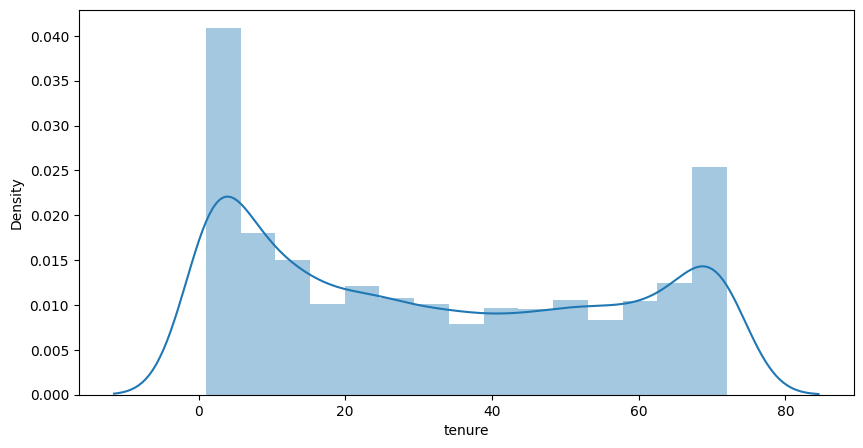

In [ ]:
f,ax = plt.subplots(figsize=(10,5))
sns.distplot(df['tenure'])

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

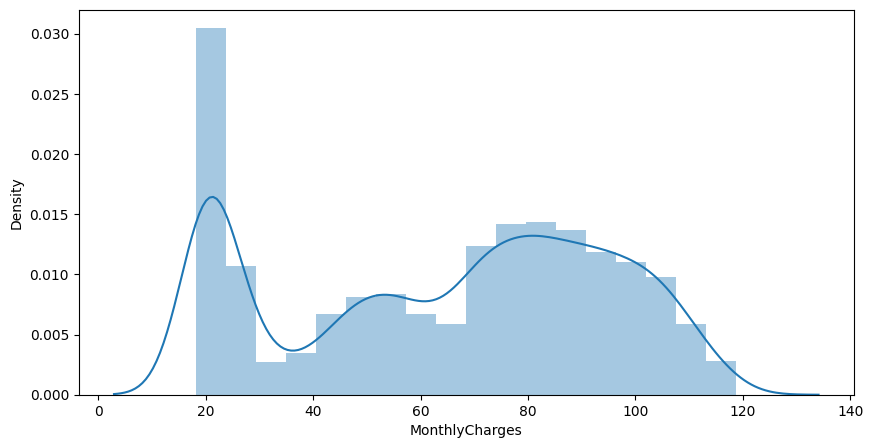

In [ ]:
f,ax = plt.subplots(figsize=(10,5))
sns.distplot(df['MonthlyCharges'])

<Axes: xlabel='TotalCharges', ylabel='Density'>

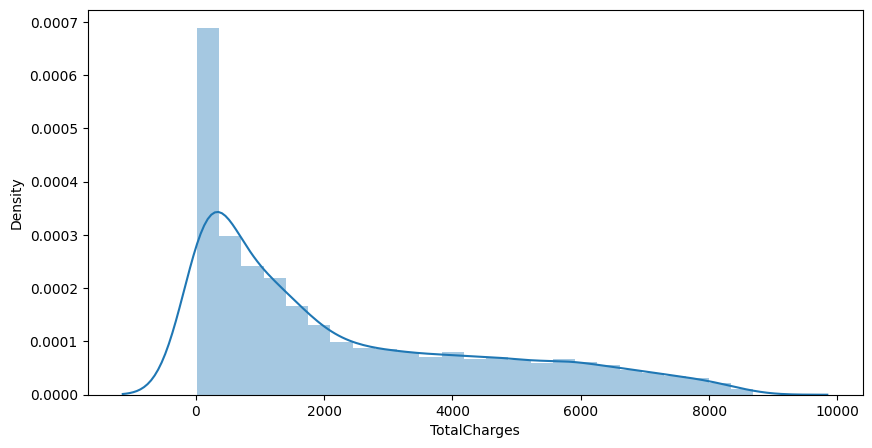

In [ ]:
f,ax = plt.subplots(figsize=(10,5))
sns.distplot(df['TotalCharges'])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

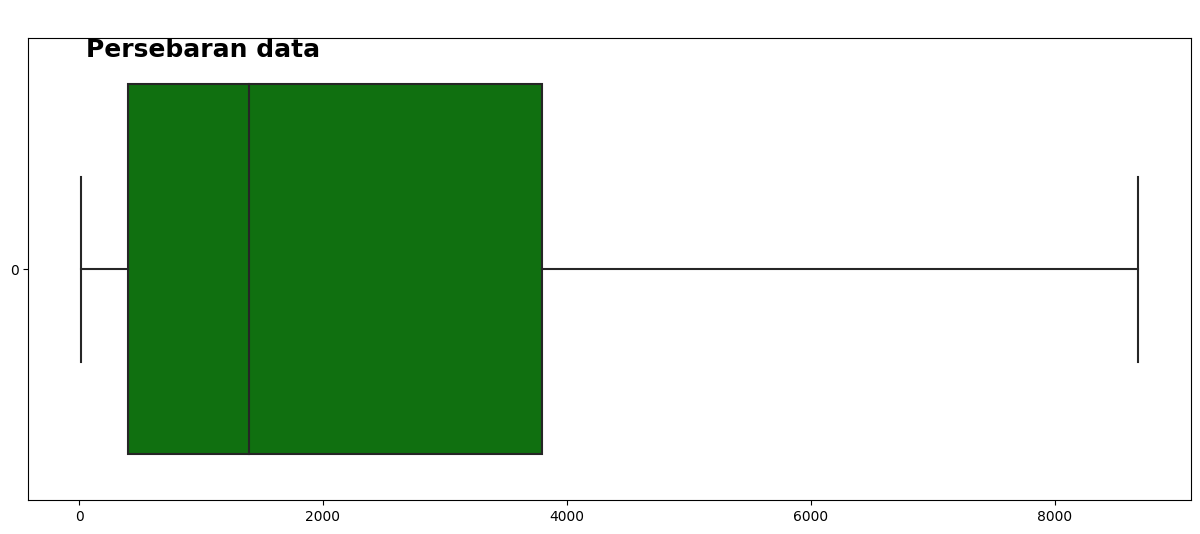

In [ ]:
#boxplot
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df['TotalCharges'],color='green',orient='h')


title = '''
Persebaran data 
'''
ax.text(60,-0.4,title,horizontalalignment='left',color='black',fontsize=18,fontweight='bold')

plt.tight_layout   

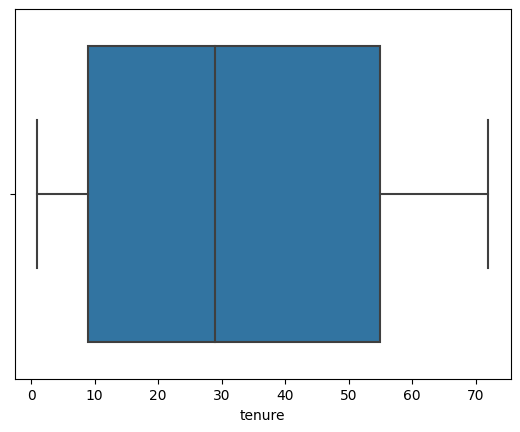

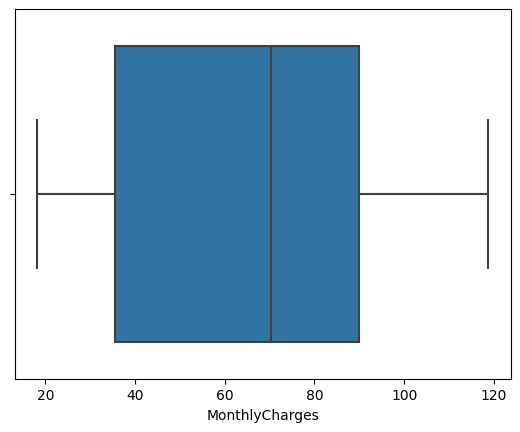

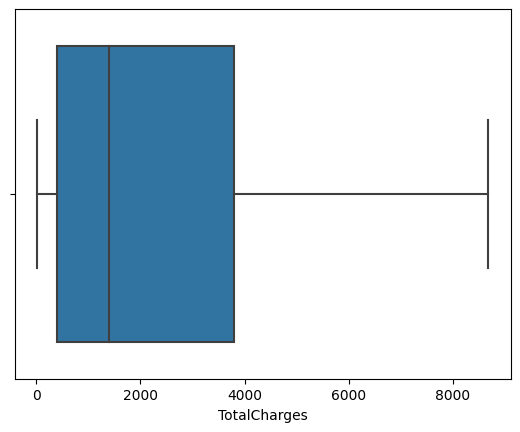

In [ ]:
# melakukan pencarian anomali handling menggunakan boxplot
# anomali handling digunakan pada data numerik

plt.figure()
sns.boxplot(x=df['tenure'])
plt.show()
plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.show()

Kesimpulannya jika dilihat dari boxplot tersebut anomalies dan outliers pada dataset ini tidak ada maka, tidak diperlukan untuk handling masalah tersebut